# **Weekday vs Weekend Walking Distance Analysis**
## **Hypothesis Testing and Exploratory Data Analysis (EDA)**

### **Purpose**
This notebook focuses on:
1. Exploring walking distance trends using **EDA**.
2. Testing the hypothesis:
   - **Null Hypothesis (\(H_0\))**: Weekday walking distances are not significantly higher than weekend walking distances.
   - **Alternative Hypothesis (\(H_a\))**: Weekday walking distances are significantly higher than weekend walking distances.

---

### **Steps**:
1. Load the walking distance dataset.
2. Perform EDA to summarize and visualize weekday vs weekend trends.
3. Conduct the Mann-Whitney U Test to validate the hypothesis.

### Importing Libraries and Loading Data
We will:
1. Import necessary libraries:
   - `pandas` for data manipulation.
   - `matplotlib` and `seaborn` for visualizations.
   - `scipy.stats.mannwhitneyu` for the statistical test.
2. Load the processed dataset created in the data parsing notebook.

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load the processed dataset
file_path = 'processed_walking_data.csv'  # Replace with the correct file path

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"File not found at: {file_path}. Ensure the dataset is processed and saved.")

Data loaded successfully!
         Date  WalkingDistance_km  Weekday  IsWeekend
0  2019-10-28             0.02648        0      False
1  2019-10-28             0.00547        0      False
2  2019-11-29             0.09277        4      False
3  2019-11-29             0.05989        4      False
4  2019-11-29             0.07366        4      False


### Exploratory Data Analysis (EDA)
We will:
1. Summarize walking distances using descriptive statistics.
2. Compare weekday and weekend walking distances.
3. Visualize the data using:
   - Distribution Plot
   - Weekly Trend Line Plot

### Weekday Walking Distances:
count    49290.000000
mean         0.116851
std          0.147486
min          0.000410
25%          0.018520
50%          0.056554
75%          0.155608
max          1.247270
Name: WalkingDistance_km, dtype: float64

### Weekend Walking Distances:
count    19401.000000
mean         0.115639
std          0.148331
min          0.000410
25%          0.017890
50%          0.053640
75%          0.154390
max          1.066780
Name: WalkingDistance_km, dtype: float64


/var/folders/82/jhtzncfd3tvdg_n1r7bsnvr40000gn/T/ipykernel_49228/2480421069.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weekday_data, label='Weekdays', shade=True, color='blue')
/var/folders/82/jhtzncfd3tvdg_n1r7bsnvr40000gn/T/ipykernel_49228/2480421069.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weekend_data, label='Weekends', shade=True, color='orange')


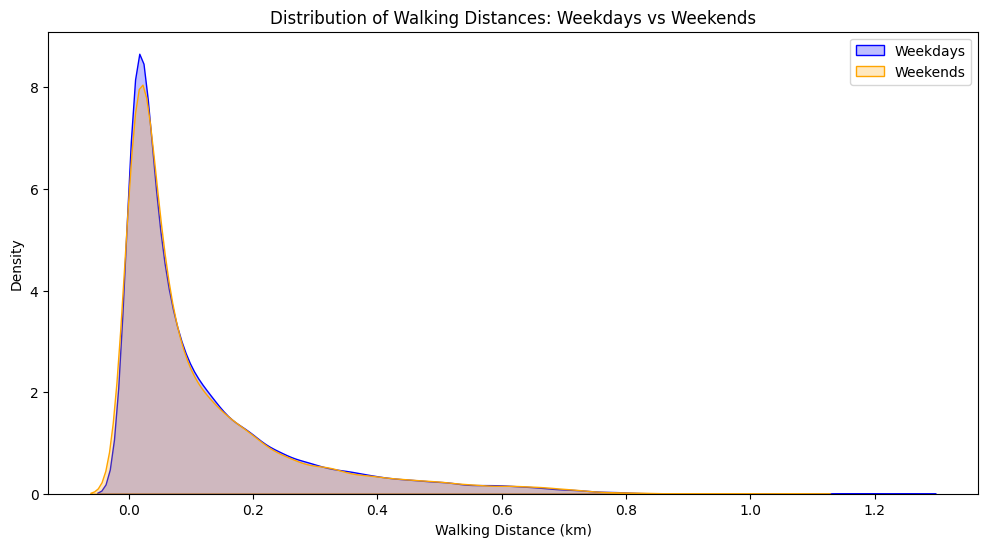

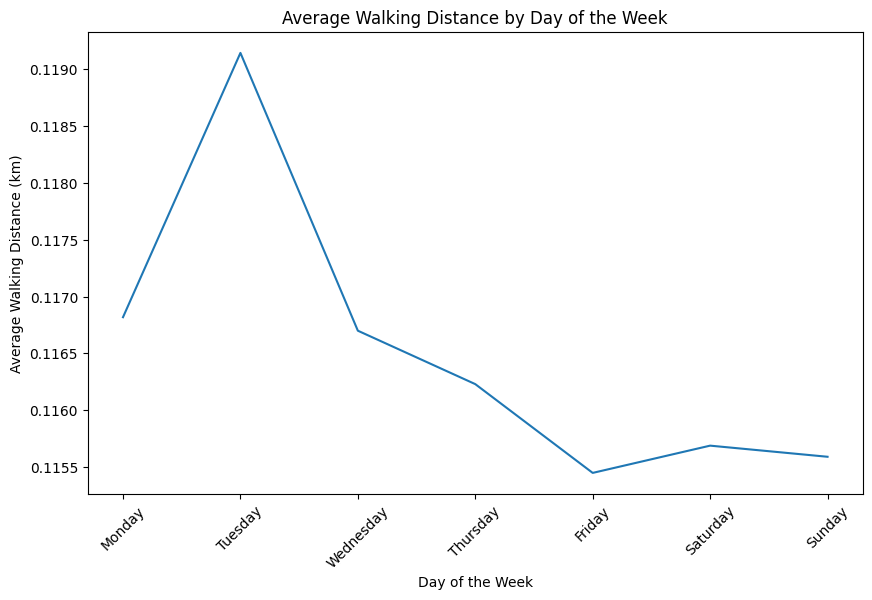

In [5]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Add Weekday and Weekend labels
df['Weekday'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 1. Descriptive statistics
weekday_data = df[df['IsWeekend'] == 'Weekday']['WalkingDistance_km']
weekend_data = df[df['IsWeekend'] == 'Weekend']['WalkingDistance_km']

print("### Weekday Walking Distances:")
print(weekday_data.describe())
print("\n### Weekend Walking Distances:")
print(weekend_data.describe())

# 2. Visualizations
# Distribution Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(weekday_data, label='Weekdays', shade=True, color='blue')
sns.kdeplot(weekend_data, label='Weekends', shade=True, color='orange')
plt.title('Distribution of Walking Distances: Weekdays vs Weekends')
plt.xlabel('Walking Distance (km)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Weekly Trend Line Plot
df['DayOfWeek'] = df['Date'].dt.day_name()
avg_distance_per_day = df.groupby('DayOfWeek')['WalkingDistance_km'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.lineplot(x=day_order, y=avg_distance_per_day.reindex(day_order))
plt.title('Average Walking Distance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Walking Distance (km)')
plt.xticks(rotation=45)
plt.show()

### Hypothesis Testing
We will perform the **Mann-Whitney U Test**, a non-parametric test to compare walking distances between weekdays and weekends.

#### Hypotheses:
- **Null Hypothesis (\(H_0\))**: Weekday walking distances are not higher than weekend walking distances.
- **Alternative Hypothesis (\(H_a\))**: Weekday walking distances are significantly higher than weekend walking distances.

In [19]:
# Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(weekday_data, weekend_data, alternative='greater')

# Display results
print("### Mann-Whitney U Test Results ###")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0). Weekday walking distances are significantly higher than weekend walking distances.")
else:
    print("Fail to reject the null hypothesis (H0). No significant difference.")

### Mann-Whitney U Test Results ###
U-Statistic: 483563539.0
P-Value: 0.01019511408917417
Reject the null hypothesis (H0). Weekday walking distances are significantly higher than weekend walking distances.


### Conclusion

From the EDA and hypothesis testing, we observe:

1. **EDA Insights**:
   - Walking distances on weekdays generally show higher average values than weekends.
   - The weekly trend suggests structured activity on weekdays and variability on weekends.

2. **Hypothesis Testing**:
   - \(P < 0.05\): Reject the null hypothesis (\(H_0\)).
   - Weekday walking distances are significantly higher than weekend walking distances.

---

### Next Steps
1. Proceed to the **visualization notebook** for deeper insights.
2. Use visualizations to effectively communicate findings.